In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# the MNIST data is split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

In [89]:
    # Reshape to be samples*pixels*width*height
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [90]:
# One hot Code
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [91]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [92]:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               57700     
__________

In [94]:
def evaluate_model(X_train, y_Train, n_folds=5):
    accuracy, data = list(), list()
    # prepare 5-cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for x_train, x_test in kfold.split(X_train):
        # create model
        model = create_model()
        # select rows for train and test
        trainX, trainY, testX, testY = X_train[x_train], y_Train[x_train], X_train[x_test], y_Train[x_test]
        # fit model
        data_fit = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        # stores Accuracy 
        accuracy.append(acc)
        data.append(data_fit)
    return accuracy, data



In [95]:
# summarize model performance
def summarize_performance(acc):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (numpy.mean(acc) * 100, numpy.std(acc) * 100, len(acc)))
    
    # box and whisker plots of results
    plt.boxplot(acc)
    plt.show()

 

In [86]:
summarize_performance(acc)

NameError: name 'acc' is not defined

In [55]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 52s 874us/sample - loss: 0.2752 - acc: 0.9197 - val_loss: 0.0757 - val_acc: 0.9777
Epoch 2/10
60000/60000 [==============================] - 52s 864us/sample - loss: 0.0700 - acc: 0.9783 - val_loss: 0.0428 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 53s 889us/sample - loss: 0.0486 - acc: 0.9849 - val_loss: 0.0403 - val_acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 50s 833us/sample - loss: 0.0376 - acc: 0.9880 - val_loss: 0.0333 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 53s 879us/sample - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0332 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 52s 867us/sample - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0298 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] 

 - 3s - loss: 0.0253 - acc: 0.9918


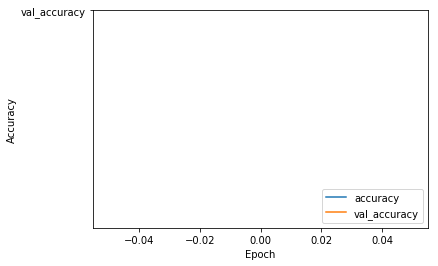

In [62]:
plt.plot(['accuracy'], label='accuracy')
plt.plot(['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [63]:
print(test_acc) #Day 1 wrapped up with the result

0.9918


In [80]:
# serialize model to JSON and save the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("final_model.h5")

In [81]:
def predict(img):
    image = img.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image = cv2.threshold(image, 140, 255, cv2.THRESH_BINARY)[1]
    image = cv2.resize(image, (28, 28))
    # display_image(image)
    image = image.astype('float32')
    image = image.reshape(1, 28, 28, 1)
    image /= 255

    # plt.imshow(image.reshape(28, 28), cmap='Greys')
    # plt.show()
    model = load_model('cnn.hdf5')
    pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

    print("Predicted Number: ", pred.argmax())

    # return pred.argmax()

In [96]:
import numpy as np

print(np.argmax(pred[4]))
X_test0 = X_test[4].reshape(28,28)
plt.imshow(X_test0)
plt.show()
print(pred.shape)

NameError: name 'pred' is not defined